In [3]:
import numpy as np
import pandas as pd
 
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
 
# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
 
# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
 
# Modèles de Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
 
# Évaluation des modèles
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    r2_score
)

In [4]:
data = pd.read_csv("economy.csv")

print(data.head(10))

column_nan_count = data.isnull().sum()
print("NaN count per column:")
print(column_nan_count)
# Conversion price et time_taken
if 'price' in data.columns and data['price'].dtype == 'object':
    data['price'] = data['price'].str.replace(',', '').astype(float)
if 'time_taken' in data.columns and data['time_taken'].dtype == 'object':
    data['time_taken'] = data['time_taken'].str.replace('h', '').str.replace('m', '').str.split().apply(lambda x: float(x[0]) + float(x[1])/60 if len(x) == 2 else 0)


   date   airline   ch_code', 'num_code source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   
5           5   Vistara   UK-945       Delhi        Morning  zero   
6           6   Vistara   UK-927       Delhi        Morning  zero   
7           7   Vistara   UK-951       Delhi      Afternoon  zero   
8           8  GO_FIRST   G8-334       Delhi  Early_Morning  zero   
9           9  GO_FIRST   G8-336       Delhi      Afternoon  zero   

    arrival_time destination_city    class  time_taken  price  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning

In [13]:
print(data.describe())

          date       time_taken      price          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   ch_code', 'num_code            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   time_taken          300153 non-null  float64
 10  price         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


# Colonnes :
    - Unnamed: index, int (TO DELETE)
    - airline : nom compagnie aérienne, char (TO DELETE)
    - ch_code', 'num_code : numéro de vol, char composé de chiffres et de lettres "ex : AA1234" (TO DELETE)
    - source_city : aéroport de départ, char
    - departure_time : heure de départ, char ("Early_Morning", "Morning", "Afternoon", "Evening", "Night")
    - stop : nombre d'escales, int
    - arrival_time : heure d'arrivée, char ("Early_Morning", "Morning", "Afternoon", "Evening", "Night")
    - destination_city : aéroport d'arrivée, char
    - class : classe de voyage, char ("Business", "Economy", "Economy Plus")
    - time_taken : durée du vol en minutes, flot
    - price : nombre de jours avant le départ, int
    - price : prix du billet, int = dollars

In [8]:
df = data.drop(columns=['date'], inplace=False)
df = df.drop(columns=['ch_code', 'num_code'], inplace=False)
df = df.drop(columns=['airline'], inplace=False)

## Duplicates et valeurs manquantes

In [9]:
duplicate_count = df.duplicated().sum()
missing_values = df.isnull().sum()
print(f"Nombre de doublons : {duplicate_count}")
print("Valeurs manquantes par colonne :")
print(missing_values)

Nombre de doublons : 3875
Valeurs manquantes par colonne :
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
time_taken            0
price           0
price               0
dtype: int64


### Grape pour voir les données aberrantes et la distribution des données

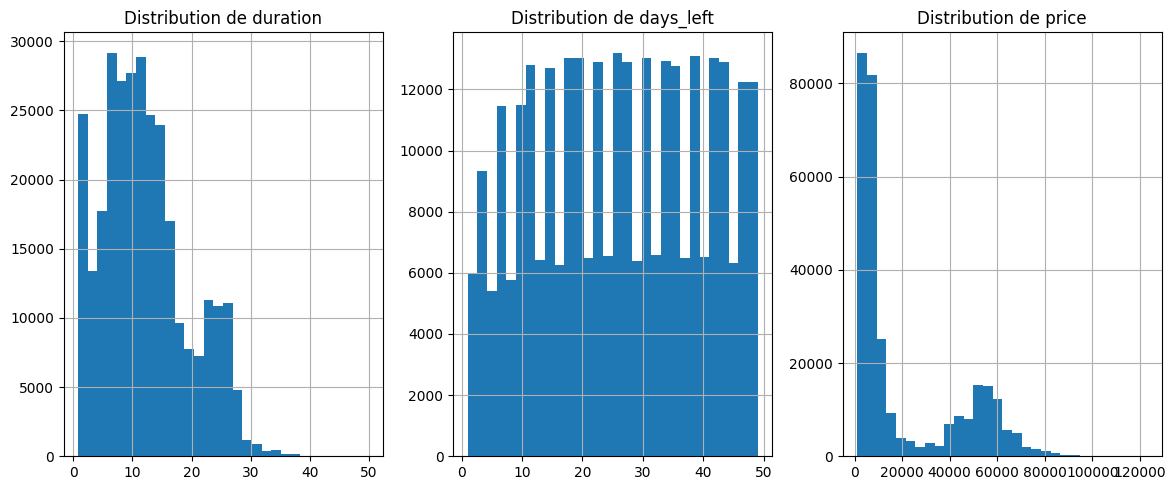

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
df.hist(column='time_taken', bins=30, ax=axes[0])
df.hist(column='price', bins=30, ax=axes[1])
df.hist(column='price', bins=30, ax=axes[2])
axes[0].set_title('Distribution de time_taken')
axes[1].set_title('Distribution de price')
axes[2].set_title('Distribution de price')
plt.tight_layout()
plt.show()

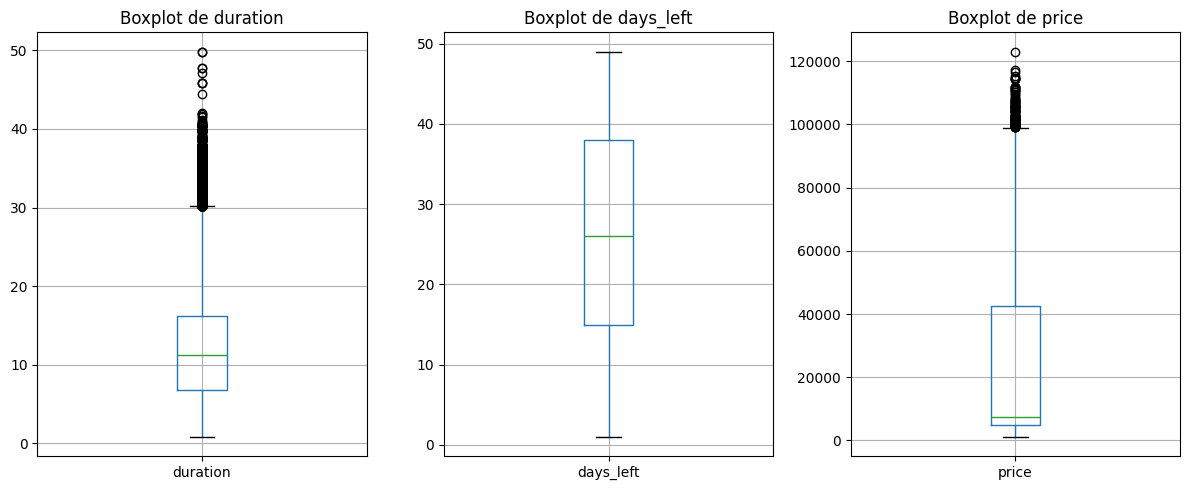

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
df.boxplot(column='time_taken', ax=axes[0])
df.boxplot(column='price', ax=axes[1])
df.boxplot(column='price', ax=axes[2])
axes[0].set_title('Boxplot de time_taken')
axes[1].set_title('Boxplot de price') 
axes[2].set_title('Boxplot de price') 
plt.tight_layout()
plt.show()

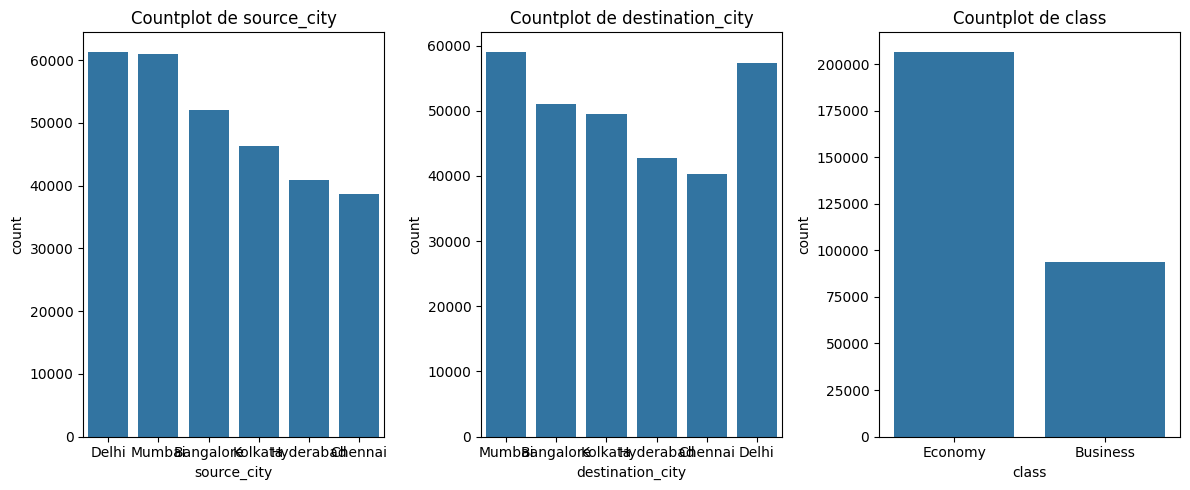

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.countplot(x=df['source_city'], ax=axes[0])
axes[0].set_title('Countplot de source_city')
sns.countplot(x=df['destination_city'], ax=axes[1])
axes[1].set_title('Countplot de destination_city')
sns.countplot(x=df['class'], ax=axes[2])
axes[2].set_title('Countplot de class')
plt.tight_layout()
plt.show()